In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import  scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,
                                               test_size=0.2
                                               ,random_state=0)

/var/folders/zz/mdc4c77n6sd57198x8jgnx4c0000gn/T/ipykernel_1366/3484363480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


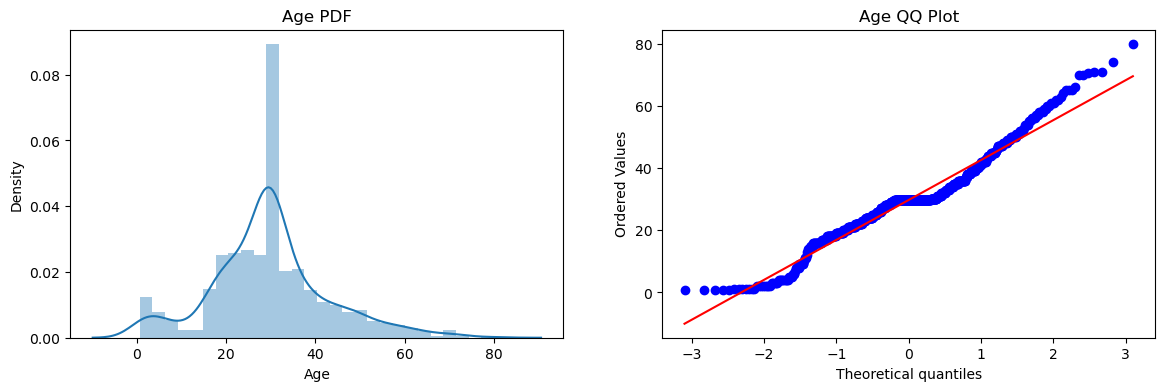

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

/var/folders/zz/mdc4c77n6sd57198x8jgnx4c0000gn/T/ipykernel_1366/2392772702.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


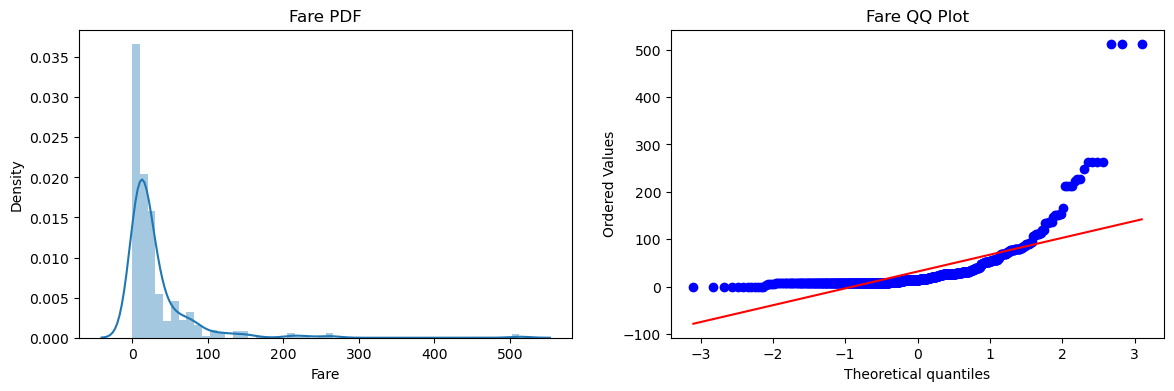

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()



In [31]:
clf.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print('Accuracy LR',accuracy_score(Y_test,y_pred))
print('Accuracy DT',accuracy_score(Y_test,y_pred))

Accuracy LR 0.6983240223463687
Accuracy DT 0.6983240223463687


In [33]:
trf=FunctionTransformer(func=np.log1p)

In [34]:
X_train_transfromed=trf.fit_transform(X_train)
X_test_transfromed=trf.fit_transform(X_test)

In [37]:
clf.fit(X_train_transfromed,Y_train)
clf2.fit(X_train_transfromed,Y_train)

y_pred_=clf.predict(X_test_transfromed)
y_pred_1=clf2.predict(X_test_transfromed)

print('Accuracy LR',accuracy_score(Y_test,y_pred_))
print('Accuracy DT',accuracy_score(Y_test,y_pred_1))


Accuracy LR 0.7039106145251397
Accuracy DT 0.6759776536312849


In [39]:
X_transformed=trf.fit_transform(x)

In [41]:
print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599875156054932


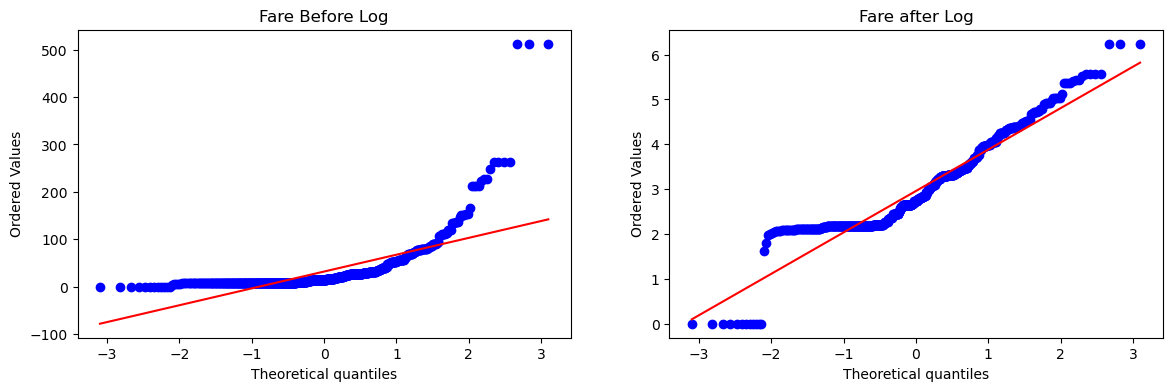

In [43]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transfromed['Fare'],dist='norm',plot=plt)
plt.title('Fare after Log')

plt.show()

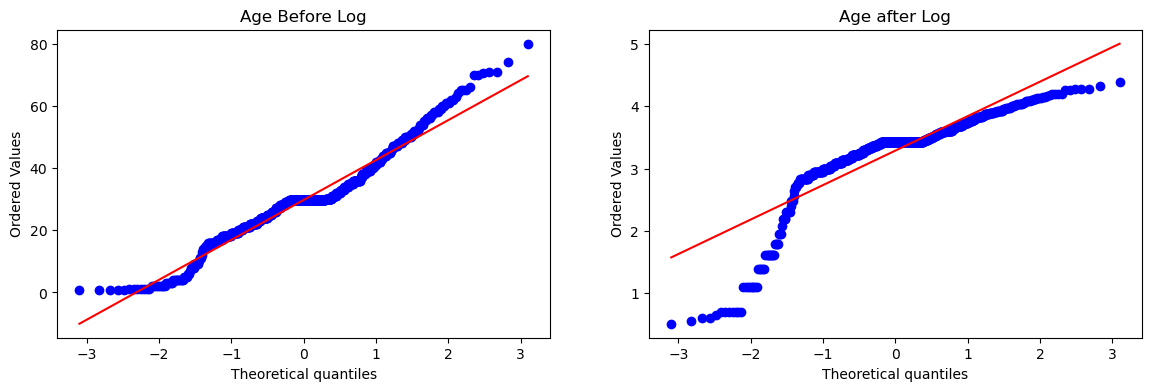

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transfromed['Age'],dist='norm',plot=plt)
plt.title('Age after Log')

plt.show()

### Other Transformers


In [45]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6712609238451936


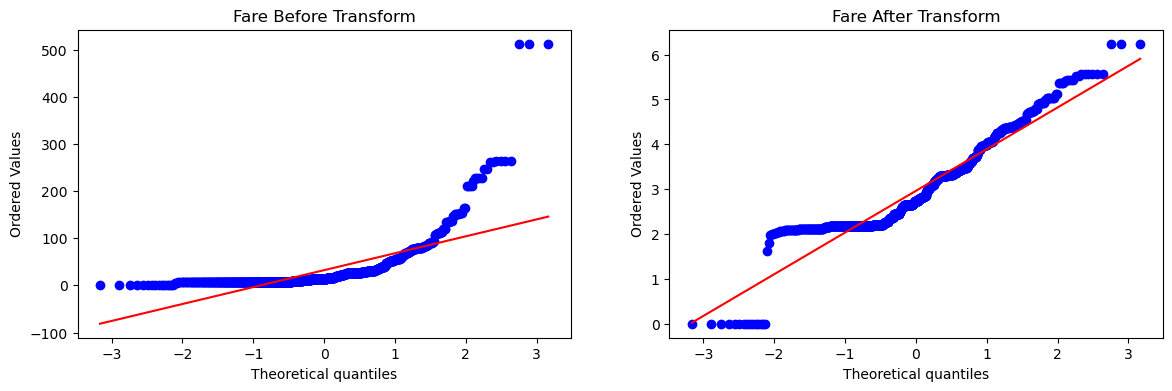

In [55]:
apply_transform(np.log1p)